In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("C:/Users/ASUS/Desktop/ML/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
df.rename(columns={"Sp. Atk":"Special_attack","Sp. Def":"Special_defense"},inplace=True)

In [7]:
null_values = df.isnull().sum()
duplicate_values = df.duplicated().sum()

print("Null values", null_values)
print("\n Duplicate values", duplicate_values)

Null values #                    0
Name                 0
Type 1               0
Type 2             386
Total                0
HP                   0
Attack               0
Defense              0
Special_attack       0
Special_defense      0
Speed                0
Generation           0
Legendary            0
dtype: int64

 Duplicate values 0


In [8]:
#Value counts and unique value of type 1, type 2 pokemon and their generation

type_1 = df['Type 1'].value_counts()
type_2 = df['Type 2'].value_counts()
generation = df['Generation'].value_counts()
legendary = df['Legendary'].value_counts() 

type_1_counts = df['Type 1'].nunique()
type_2_counts = df['Type 2'].nunique()
generation_counts = df['Generation'].nunique()

print("Type 1 Pokemon", type_1, "Type 1 Pokemon counts", type_1_counts)
print("\n Type 2 Pokemon", type_2, "Type 2 Pokemon counts", type_2_counts)
print("\n Generation of Pokemon", generation, "Total number of generation", generation_counts)
print("\n Legendary", legendary) 


Type 1 Pokemon Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64 Type 1 Pokemon counts 18

 Type 2 Pokemon Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64 Type 2 Pokemon counts 18

 Generation of Pokemon Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64 Total number of generation 6

 Legendary Legendary
False    735
True      65
Name: count, dtype: int64


In [9]:
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>19:
        num.append(column)
    else:
        cat.append(column)

print("Categorical Attributes", cat)
print("\nNumerical Attributes", num) 

Categorical Attributes ['Type 1', 'Type 2', 'Generation', 'Legendary']

Numerical Attributes ['#', 'Name', 'Total', 'HP', 'Attack', 'Defense', 'Special_attack', 'Special_defense', 'Speed']


Univariate Analysis of Numerical Attributes 

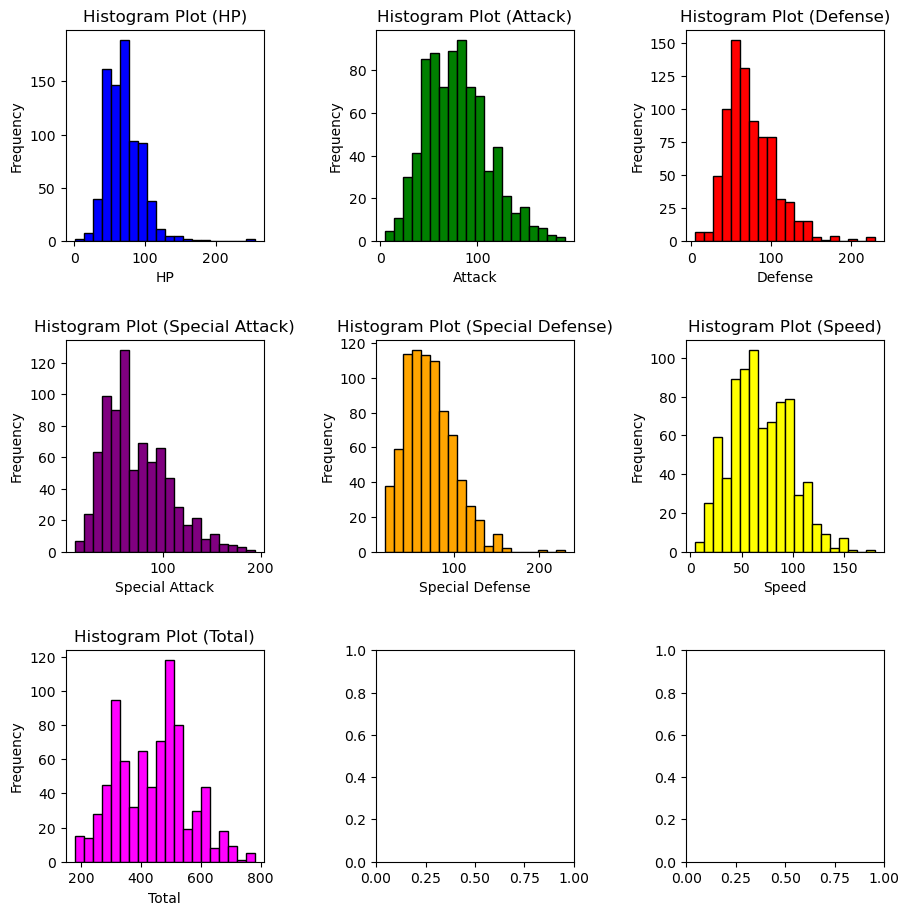

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  
fig.tight_layout(pad=5.0)  

axes[0, 0].hist(df['HP'], bins=20, color='blue', edgecolor='black')
axes[0, 0].set_title('Histogram Plot (HP)')
axes[0, 0].set_xlabel('HP')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['Attack'], bins=20, color='green', edgecolor='black')
axes[0, 1].set_title('Histogram Plot (Attack)')
axes[0, 1].set_xlabel('Attack')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(df['Defense'], bins=20, color='red', edgecolor='black')
axes[0, 2].set_title('Histogram Plot (Defense)')
axes[0, 2].set_xlabel('Defense')
axes[0, 2].set_ylabel('Frequency')

axes[1, 0].hist(df['Special_attack'], bins=20, color='purple', edgecolor='black')
axes[1, 0].set_title('Histogram Plot (Special Attack)')
axes[1, 0].set_xlabel('Special Attack')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['Special_defense'], bins=20, color='orange', edgecolor='black')
axes[1, 1].set_title('Histogram Plot (Special Defense)')
axes[1, 1].set_xlabel('Special Defense')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].hist(df['Speed'], bins=20, color='yellow', edgecolor='black')
axes[1, 2].set_title('Histogram Plot (Speed)')
axes[1, 2].set_xlabel('Speed')
axes[1, 2].set_ylabel('Frequency')

axes[2, 0].hist(df['Total'], bins=20, color='magenta', edgecolor='black')
axes[2, 0].set_title('Histogram Plot (Total)')
axes[2, 0].set_xlabel('Total')
axes[2, 0].set_ylabel('Frequency')

plt.show()


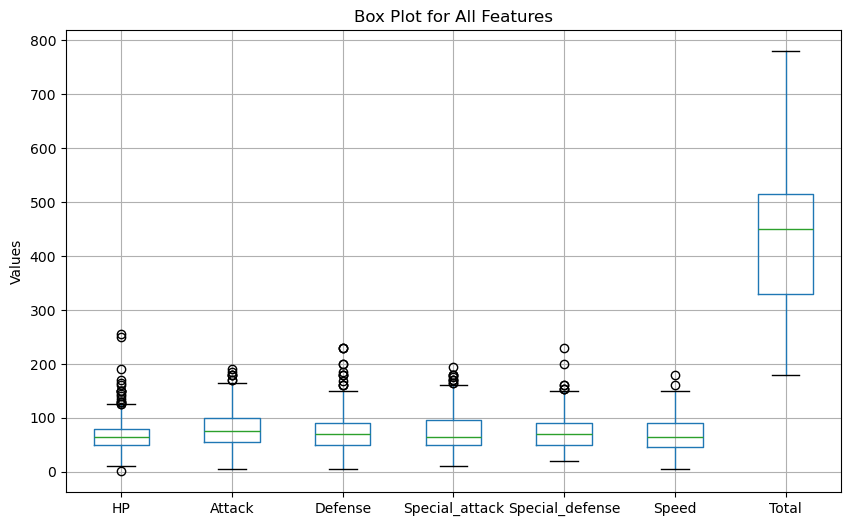

In [12]:
plt.figure(figsize=(10, 6))
df.boxplot(column=['HP', 'Attack', 'Defense', 'Special_attack', 'Special_defense', 'Speed', 'Total'])
plt.title('Box Plot for All Features')
plt.ylabel('Values') 
plt.show()

In [13]:
df[df['HP'] == df['HP'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [14]:
df[df['HP'] == df['HP'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


In [15]:
df[df['Attack'] == df['Attack'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [16]:
df[df['Attack'] == df['Attack'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


In [17]:
df[df['Defense'] == df['Defense'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [18]:
df[df['Defense'] == df['Defense'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


In [22]:
df[df['Special_attack'] == df['Special_attack'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [29]:
df[df['Special_attack'] == df['Special_attack'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False


In [30]:
df[df['Special_defense'] == df['Special_defense'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


In [31]:
df[df['Special_defense'] == df['Special_defense'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
188,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
347,318,Carvanha,Water,Dark,305,45,90,20,65,20,65,3,False
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True


In [33]:
df[df['Speed'] == df['Speed'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


In [37]:
df[df['Speed'] == df['Speed'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False


In [43]:
df[df['Total'] == df['Total'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [49]:
df[df['Total'] == df['Total'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special_attack,Special_defense,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


Univariate Analysis of Categorical Attributes 

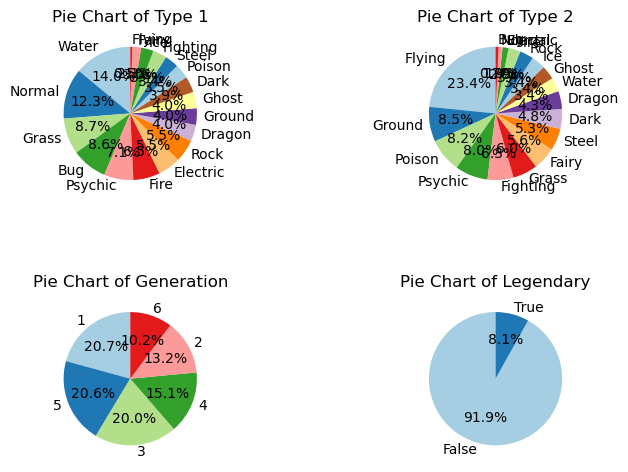

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout(pad=5.0)

type1_counts = df['Type 1'].value_counts()
axes[0, 0].pie(type1_counts, labels=type1_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0, 0].set_title('Pie Chart of Type 1')

type2_counts = df['Type 2'].value_counts()
axes[0, 1].pie(type2_counts, labels=type2_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0, 1].set_title('Pie Chart of Type 2')

generation_counts = df['Generation'].value_counts()
axes[1, 0].pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1, 0].set_title('Pie Chart of Generation')

legendary_counts = df['Legendary'].value_counts()
axes[1, 1].pie(legendary_counts, labels=legendary_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1, 1].set_title('Pie Chart of Legendary')

plt.show()


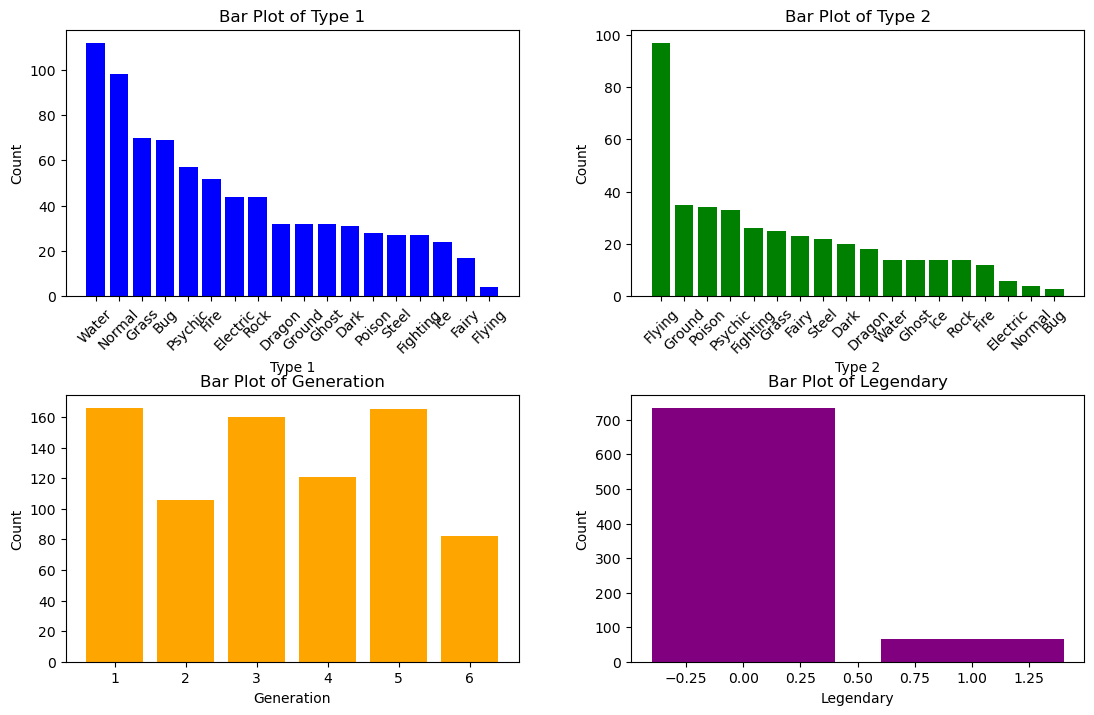

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=5.0)

type1_counts = df['Type 1'].value_counts()
axes[0, 0].bar(type1_counts.index, type1_counts.values, color='blue')
axes[0, 0].set_title('Bar Plot of Type 1')
axes[0, 0].set_xlabel('Type 1')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

type2_counts = df['Type 2'].value_counts()
axes[0, 1].bar(type2_counts.index, type2_counts.values, color='green')
axes[0, 1].set_title('Bar Plot of Type 2')
axes[0, 1].set_xlabel('Type 2')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

generation_counts = df['Generation'].value_counts()
axes[1, 0].bar(generation_counts.index, generation_counts.values, color='orange')
axes[1, 0].set_title('Bar Plot of Generation')
axes[1, 0].set_xlabel('Generation')
axes[1, 0].set_ylabel('Count')

legendary_counts = df['Legendary'].value_counts()
axes[1, 1].bar(legendary_counts.index, legendary_counts.values, color='purple')
axes[1, 1].set_title('Bar Plot of Legendary')
axes[1, 1].set_xlabel('Legendary')
axes[1, 1].set_ylabel('Count')

plt.show()

Bivariate analysis

1. Numerical-Numerical attributes 

In [59]:
df[['HP', 'Attack', 'Defense', 'Special_attack', 'Special_defense', 'Speed']].corr()

,HP,Attack,Defense,Special_attack,Special_defense,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Special_attack,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Special_defense,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


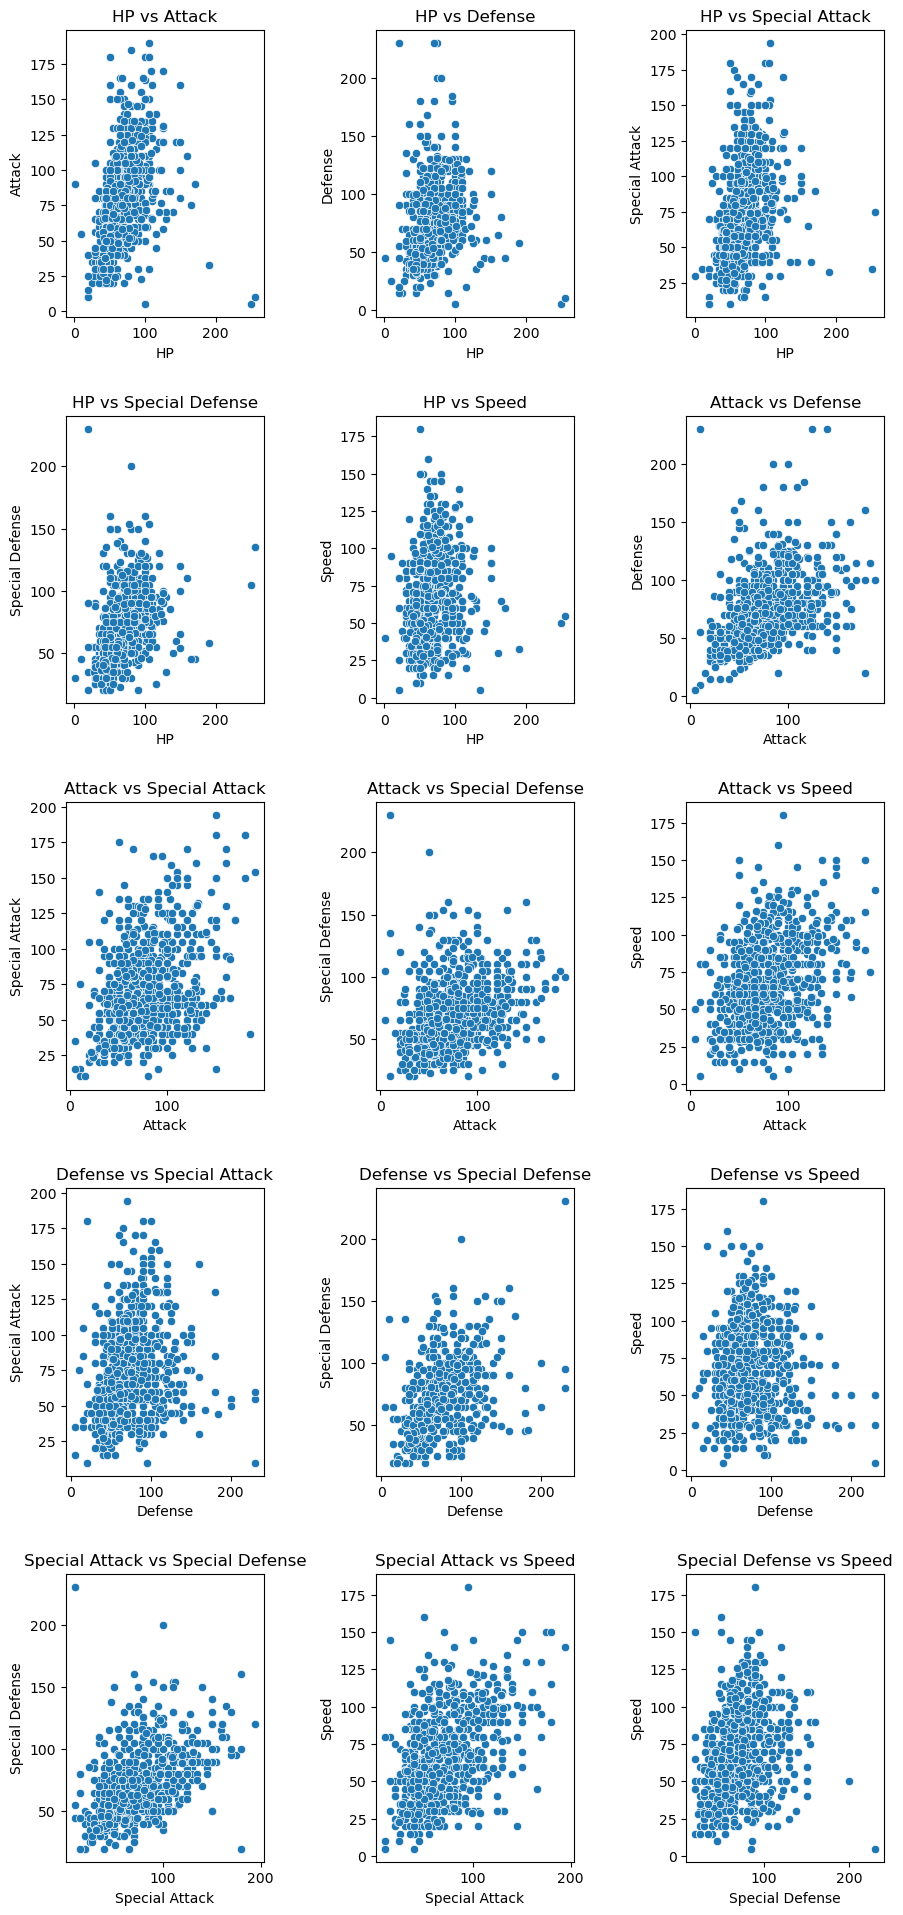

In [61]:
# Set up the figure and axes for a 5x3 grid
fig, axes = plt.subplots(5, 3, figsize=(10, 20))
fig.tight_layout(pad=5.0)  # Add space between plots for clarity

# Create scatter plots using the axes array without hue or palette
sns.scatterplot(data=df, x='HP', y='Attack', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('HP vs Attack')
axes[0, 0].set_xlabel('HP')
axes[0, 0].set_ylabel('Attack')

sns.scatterplot(data=df, x='HP', y='Defense', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('HP vs Defense')
axes[0, 1].set_xlabel('HP')
axes[0, 1].set_ylabel('Defense')

sns.scatterplot(data=df, x='HP', y='Special_attack', ax=axes[0, 2], legend=False)
axes[0, 2].set_title('HP vs Special Attack')
axes[0, 2].set_xlabel('HP')
axes[0, 2].set_ylabel('Special Attack')

sns.scatterplot(data=df, x='HP', y='Special_defense', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('HP vs Special Defense')
axes[1, 0].set_xlabel('HP')
axes[1, 0].set_ylabel('Special Defense')

sns.scatterplot(data=df, x='HP', y='Speed', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('HP vs Speed')
axes[1, 1].set_xlabel('HP')
axes[1, 1].set_ylabel('Speed')

sns.scatterplot(data=df, x='Attack', y='Defense', ax=axes[1, 2], legend=False)
axes[1, 2].set_title('Attack vs Defense')
axes[1, 2].set_xlabel('Attack')
axes[1, 2].set_ylabel('Defense')

sns.scatterplot(data=df, x='Attack', y='Special_attack', ax=axes[2, 0], legend=False)
axes[2, 0].set_title('Attack vs Special Attack')
axes[2, 0].set_xlabel('Attack')
axes[2, 0].set_ylabel('Special Attack')

sns.scatterplot(data=df, x='Attack', y='Special_defense', ax=axes[2, 1], legend=False)
axes[2, 1].set_title('Attack vs Special Defense')
axes[2, 1].set_xlabel('Attack')
axes[2, 1].set_ylabel('Special Defense')

sns.scatterplot(data=df, x='Attack', y='Speed', ax=axes[2, 2], legend=False)
axes[2, 2].set_title('Attack vs Speed')
axes[2, 2].set_xlabel('Attack')
axes[2, 2].set_ylabel('Speed')

sns.scatterplot(data=df, x='Defense', y='Special_attack', ax=axes[3, 0], legend=False)
axes[3, 0].set_title('Defense vs Special Attack')
axes[3, 0].set_xlabel('Defense')
axes[3, 0].set_ylabel('Special Attack')

sns.scatterplot(data=df, x='Defense', y='Special_defense', ax=axes[3, 1], legend=False)
axes[3, 1].set_title('Defense vs Special Defense')
axes[3, 1].set_xlabel('Defense')
axes[3, 1].set_ylabel('Special Defense')

sns.scatterplot(data=df, x='Defense', y='Speed', ax=axes[3, 2], legend=False)
axes[3, 2].set_title('Defense vs Speed')
axes[3, 2].set_xlabel('Defense')
axes[3, 2].set_ylabel('Speed')

sns.scatterplot(data=df, x='Special_attack', y='Special_defense', ax=axes[4, 0], legend=False)
axes[4, 0].set_title('Special Attack vs Special Defense')
axes[4, 0].set_xlabel('Special Attack')
axes[4, 0].set_ylabel('Special Defense')

sns.scatterplot(data=df, x='Special_attack', y='Speed', ax=axes[4, 1], legend=False)
axes[4, 1].set_title('Special Attack vs Speed')
axes[4, 1].set_xlabel('Special Attack')
axes[4, 1].set_ylabel('Speed')

sns.scatterplot(data=df, x='Special_defense', y='Speed', ax=axes[4, 2], legend=False)
axes[4, 2].set_title('Special Defense vs Speed')
axes[4, 2].set_xlabel('Special Defense')
axes[4, 2].set_ylabel('Speed')

# Remove any unused subplots (if any)
for i in range(15, 15):
    axes[i // 3, i % 3].axis('off')

# Display the plot
plt.show()


2. Categorical-Categorical

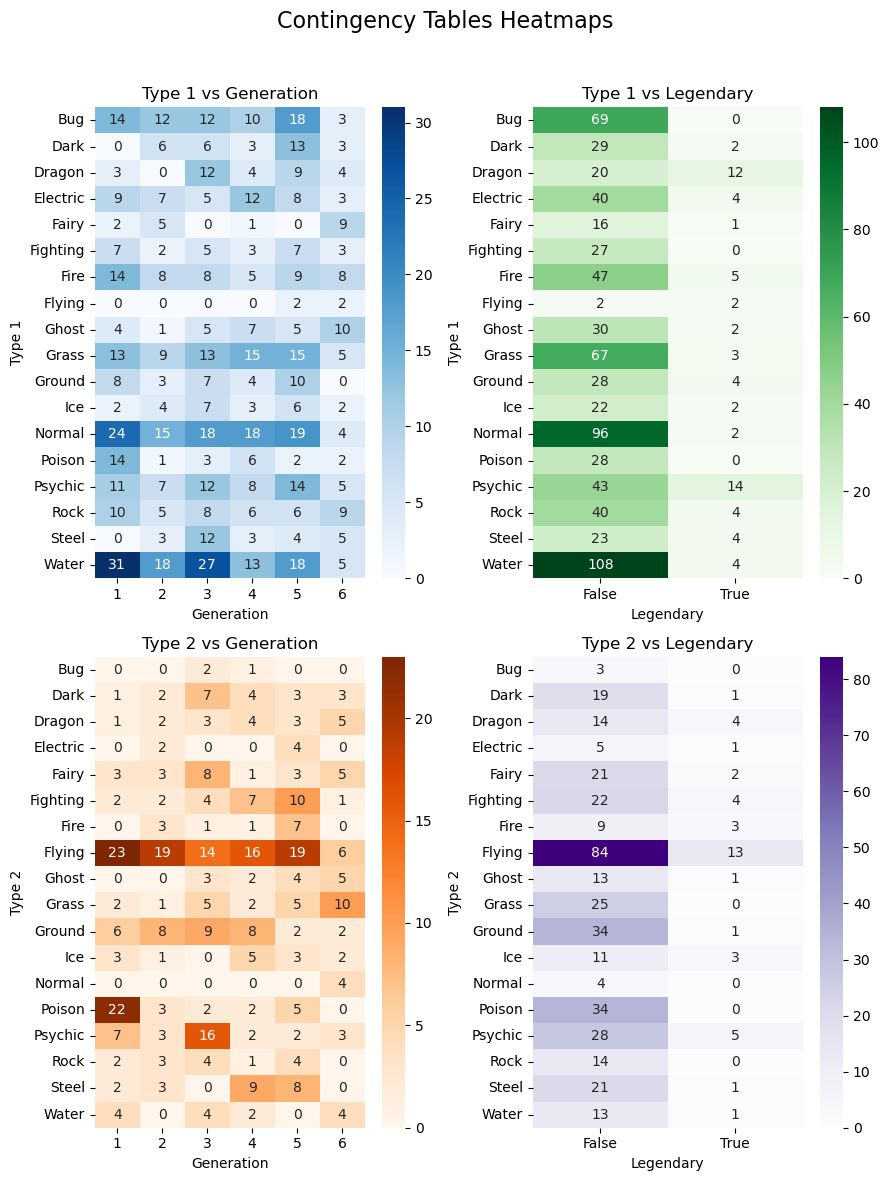

NameError: name 'chi2_contingency' is not defined

In [63]:
# 1. Create contingency tables
contingency_type1_generation = pd.crosstab(df['Type 1'], df['Generation'])
contingency_type1_legendary = pd.crosstab(df['Type 1'], df['Legendary'])
contingency_type2_generation = pd.crosstab(df['Type 2'], df['Generation'])
contingency_type2_legendary = pd.crosstab(df['Type 2'], df['Legendary'])

# 2. Create a 2x2 matrix for heatmaps
fig, axes = plt.subplots(2, 2, figsize=(9, 12))
fig.suptitle('Contingency Tables Heatmaps', fontsize=16)

# 3. Heatmap for Type 1 vs Generation
sns.heatmap(contingency_type1_generation, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Type 1 vs Generation')
axes[0, 0].set_xlabel('Generation')
axes[0, 0].set_ylabel('Type 1')

# 4. Heatmap for Type 1 vs Legendary
sns.heatmap(contingency_type1_legendary, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Type 1 vs Legendary')
axes[0, 1].set_xlabel('Legendary')
axes[0, 1].set_ylabel('Type 1')

# 5. Heatmap for Type 2 vs Generation
sns.heatmap(contingency_type2_generation, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 0])
axes[1, 0].set_title('Type 2 vs Generation')
axes[1, 0].set_xlabel('Generation')
axes[1, 0].set_ylabel('Type 2')

# 6. Heatmap for Type 2 vs Legendary
sns.heatmap(contingency_type2_legendary, annot=True, fmt='d', cmap='Purples', ax=axes[1, 1])
axes[1, 1].set_title('Type 2 vs Legendary')
axes[1, 1].set_xlabel('Legendary')
axes[1, 1].set_ylabel('Type 2')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 7. Perform Chi-Squared Tests
# Chi-Squared Test for Type 1 vs Generation
chi2_type1_generation, p_type1_generation, dof_type1_generation, expected_type1_generation = chi2_contingency(contingency_type1_generation)
# Chi-Squared Test for Type 1 vs Legendary
chi2_type1_legendary, p_type1_legendary, dof_type1_legendary, expected_type1_legendary = chi2_contingency(contingency_type1_legendary)
# Chi-Squared Test for Type 2 vs Generation
chi2_type2_generation, p_type2_generation, dof_type2_generation, expected_type2_generation = chi2_contingency(contingency_type2_generation)
# Chi-Squared Test for Type 2 vs Legendary
chi2_type2_legendary, p_type2_legendary, dof_type2_legendary, expected_type2_legendary = chi2_contingency(contingency_type2_legendary)

# 8. Display the Chi-Squared Test results
print("Chi-Squared Test between Type 1 and Generation")
print(f"Chi2 Statistic: {chi2_type1_generation}, p-value: {p_type1_generation}, Degrees of Freedom: {dof_type1_generation}")
print("\nChi-Squared Test between Type 1 and Legendary")
print(f"Chi2 Statistic: {chi2_type1_legendary}, p-value: {p_type1_legendary}, Degrees of Freedom: {dof_type1_legendary}")
print("\nChi-Squared Test between Type 2 and Generation")
print(f"Chi2 Statistic: {chi2_type2_generation}, p-value: {p_type2_generation}, Degrees of Freedom: {dof_type2_generation}")
print("\nChi-Squared Test between Type 2 and Legendary")
print(f"Chi2 Statistic: {chi2_type2_legendary}, p-value: {p_type2_legendary}, Degrees of Freedom: {dof_type2_legendary}")


In [ ]:

# 2. Create a 2x2 matrix for stacked bar plots
fig, axes = plt.subplots(2, 2, figsize=(9, 12))
fig.suptitle('Contingency Tables Stacked Bar Plots', fontsize=16)

# 3. Stacked bar plot for Type 1 vs Generation
contingency_type1_generation.plot(kind='bar', stacked=True, ax=axes[0, 0], color=['red', 'green', 'blue', 'magenta', 'orange', 'yellow'])
axes[0, 0].set_title('Type 1 vs Generation')
axes[0, 0].set_xlabel('Type 1')
axes[0, 0].set_ylabel('Count')

# 4. Stacked bar plot for Type 1 vs Legendary
contingency_type1_legendary.plot(kind='bar', stacked=True, ax=axes[0, 1], color=['blue', 'red'])
axes[0, 1].set_title('Type 1 vs Legendary')
axes[0, 1].set_xlabel('Type 1')
axes[0, 1].set_ylabel('Count')

# 5. Stacked bar plot for Type 2 vs Generation
contingency_type2_generation.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['red', 'green', 'blue', 'magenta', 'orange', 'yellow'])
axes[1, 0].set_title('Type 2 vs Generation')
axes[1, 0].set_xlabel('Type 2')
axes[1, 0].set_ylabel('Count')

# 6. Stacked bar plot for Type 2 vs Legendary
contingency_type2_legendary.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['blue', 'red'])
axes[1, 1].set_title('Type 2 vs Legendary')
axes[1, 1].set_xlabel('Type 2')
axes[1, 1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


3. Categorical-Numerical 

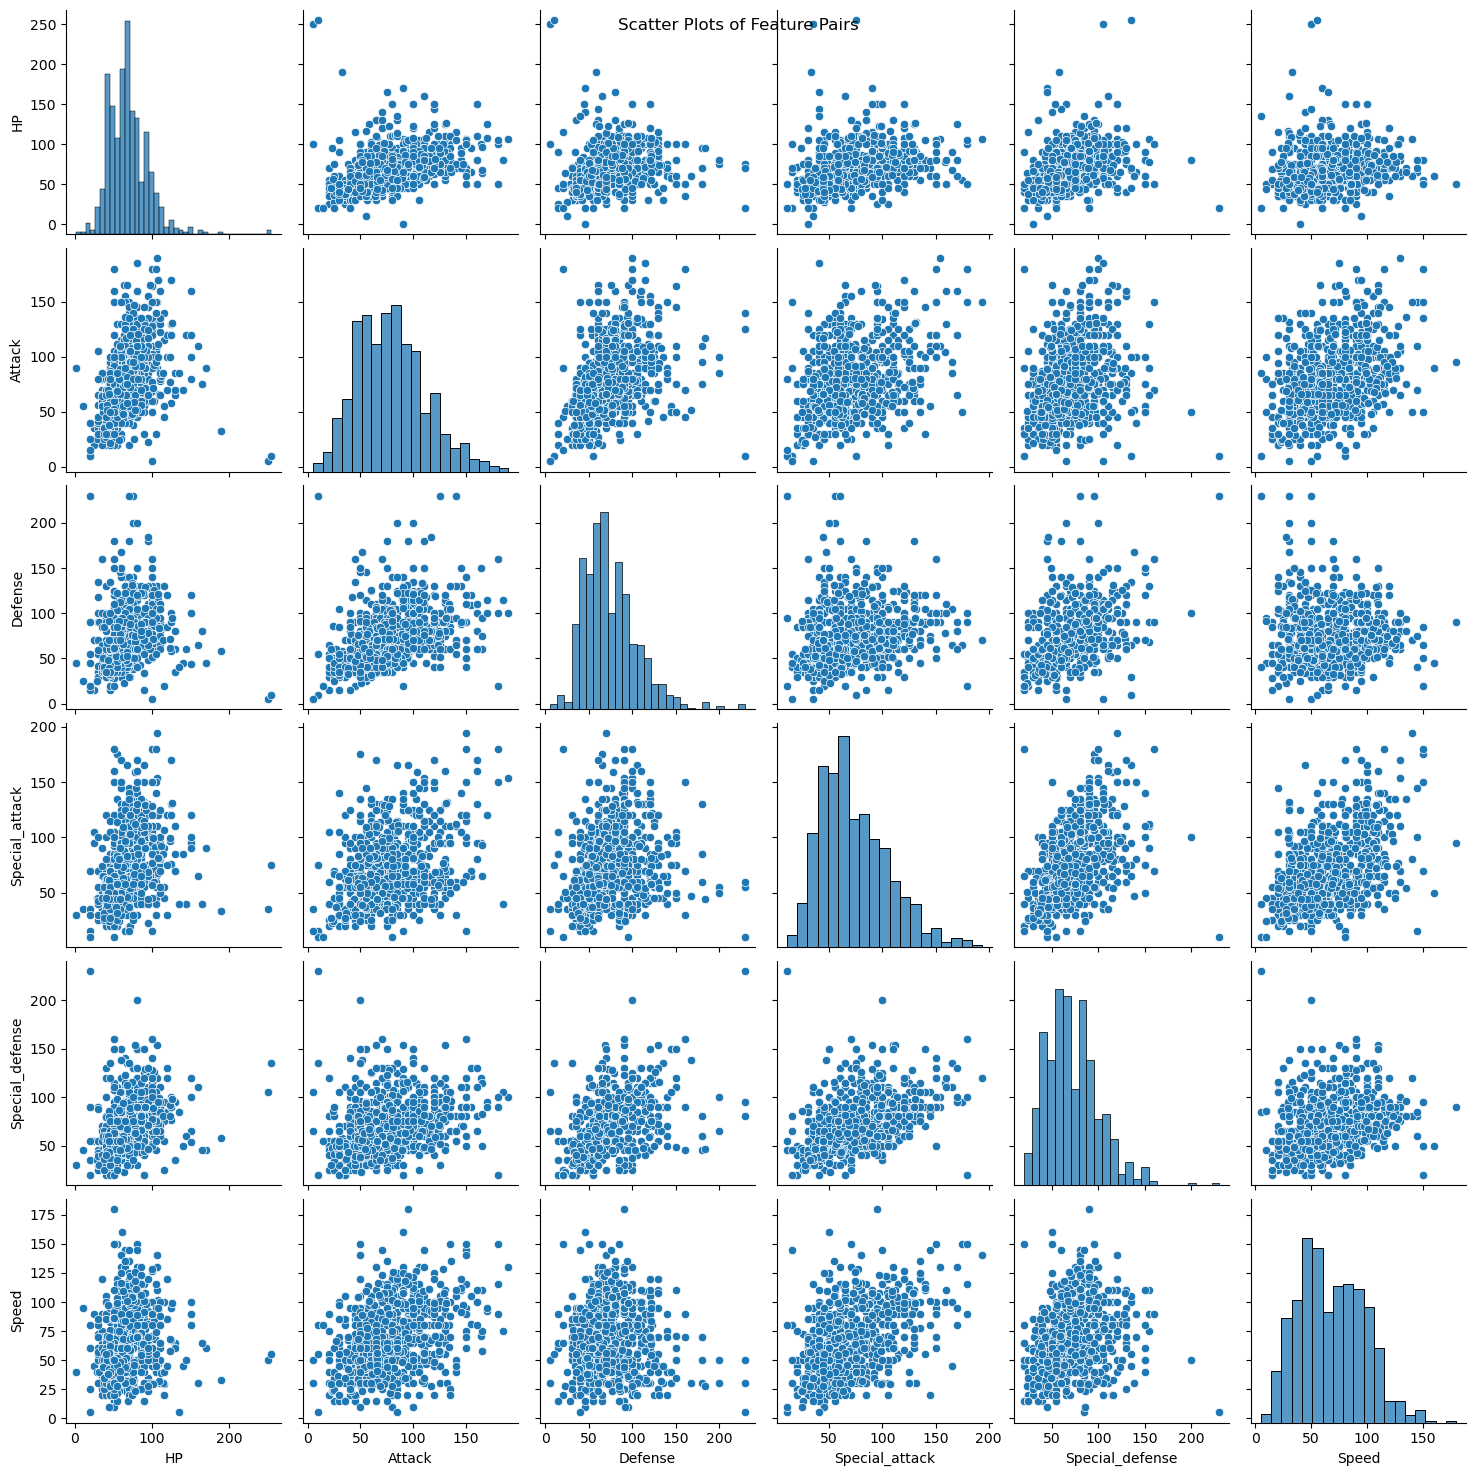

In [154]:
columns_to_compare = ['HP', 'Attack', 'Defense', 'Special_attack', 'Special_defense', 'Speed']

sns.pairplot(df[columns_to_compare])
plt.suptitle('Scatter Plots of Feature Pairs')  # Title above the plots
plt.show()
